In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from collections import defaultdict, Counter

# Importamos los datos del CSV

In [52]:


price = np.genfromtxt("./Data/idealista_madrid.csv", usecols=(0), delimiter=",",encoding='utf-8', skip_header=1, dtype=int)
bedrooms = np.genfromtxt("./Data/idealista_madrid.csv", usecols=(2), delimiter=",",encoding='utf-8', skip_header=1, dtype=int)
bathrooms = np.genfromtxt("./Data/idealista_madrid.csv", usecols=(1), delimiter=",", encoding='utf-8', skip_header=1, dtype=int)
m2 = np.genfromtxt("./Data/idealista_madrid.csv", usecols=(3), delimiter=",", encoding='utf-8', skip_header=1, dtype=int)
address = np.genfromtxt("./Data/idealista_madrid.csv", usecols=(4), delimiter=",", encoding='utf-8', skip_header=1, dtype=str)


In [53]:
print(price.dtype, price.dtype, bedrooms.dtype, bathrooms.dtype, m2.dtype, address.dtype)
print(price.shape, bedrooms.shape, bathrooms.shape, m2.shape, address.shape)

int64 int64 int64 int64 int64 <U31
(915,) (915,) (915,) (915,) (915,)


In [54]:
print(address.shape)

(915,)


## Obtencion de los datos estadisticos 

### FUNCION QUE RETORNA UN DICCIONARIO CON LOS DATOS ESTADISTICOS 
- Mínimo
- Mínimo 
- Máximo
- Media
- Cuartiles Q1, Q2 (mediana) y Q3
- Rango intercuartil
- Desviación estándar

In [55]:
def estadisticos(array):
    # Crear diccionario
    estadisticas = dict()
 
    # Calcular estadisticas y agregar estadísticas al diccionario
    estadisticas['minimo'] = min_valor = np.min(array)
    estadisticas['maximo'] = np.max(array)
    estadisticas['media'] = np.mean(array)
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)
    estadisticas['Q1'] = Q1
    estadisticas['Q2/mediana'] = np.median(array)
    estadisticas['Q3'] = Q3
    estadisticas['rango_intercuartil'] = Q3 - Q1
    estadisticas['desviacion_estandar'] = np.std(array)
    
    # Retornar el diccionario creado
    return estadisticas


### Impresion de los datos estadisticos calculados en el diccionario

In [56]:
def imprimir_estadisticas(estadisticas):
    print(f"Minimo: {estadisticas['minimo']:,}")
    print(f"Maximo: {estadisticas['maximo']:,}")
    print(f"Media: {estadisticas['media']:,.3f}")
    print(f"Q1 (Primer Cuartil): {estadisticas['Q1']:,.2f}")
    print(f"Q2 (Mediana): {estadisticas['Q2/mediana']:,.2f}")
    print(f"Q3 (Tercer Cuartil): {estadisticas['Q3']:,.2f}")
    print(f"Rango Intercuartil: {estadisticas['rango_intercuartil']:,.2f}")
    print(f"Desviación Estándar: {estadisticas['desviacion_estandar']:,.4f}")    

### Se generan la siguiente informacion:
- un grafico de BOXPLOT en el eje superior
- un histograma en el cual se delimitan:
    -  con lineas de colores la media, la mediana el primer cuartil, el tercer cuartil


In [57]:
def plot_data(array, name):
    # Crear la figura y los ejes
    
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=(10, 7), sharex=True, gridspec_kw={'height_ratios': [1, 4]})

    # Boxplot en el eje superior
    ax_box.boxplot(array, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), 
                   medianprops=dict(color='red'))
    ax_box.set(title=f'Boxplot de datos {name}', yticks=[])

    # Calcular estadísticos
    media = np.mean(array)
    mediana = np.median(array)
    desviacion_estandar = np.std(array)
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)

    # Filtrar outliers
    outliers_z_score = array[(array < media - 3 * desviacion_estandar) | (array > media + 3 * desviacion_estandar)]
    iqr = Q3 - Q1
    outliers_tukey = array[(array < Q1 - 1.5 * iqr) | (array > Q3 + 1.5 * iqr)]
    
    # Crear el histograma
    ax_hist.hist(array, bins=35, color='palegreen', edgecolor='black')
    
    # Agregar líneas verticales
    ax_hist.axvline(media, color='red', linestyle='-', linewidth=2, label=f'Media: {media:,.1f}')
    ax_hist.axvline(mediana, color='gold', linestyle='-', linewidth=2, label=f'Mediana {mediana:,.1f}')
    ax_hist.axvline(Q1, color='purple', linestyle='--', linewidth=2, label=f'Q1: {Q1:,.1f}')
    ax_hist.axvline(Q3, color='purple', linestyle='--', linewidth=2, label=f'Q3: {Q3:,.1f}')
    ax_hist.axvline(media + 3 * desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label=f'+ Z-Score {(media + 3 * desviacion_estandar):,.1f}')
    #ax_hist.axvline(media - 3 * desviacion_estandar, color='lightgrey', linestyle='--', linewidth=2, label=f'- Z-Score {(media - 3 * desviacion_estandar):,.1f}')
    ax_hist.axvline(Q3 + 1.5 * iqr, color='grey', linestyle='--', linewidth=1, label=f'+ Tukey {(Q3 + 1.5 * iqr):,.1f}')
    #ax_hist.axvline(Q1 - 1.5 * iqr, color='grey', linestyle='--', linewidth=1, label=f'- Tukey {(Q1 - 1.5 * iqr):,.1f}')
    
    
    # Marcar los outliers
    ax_hist.scatter(outliers_z_score, np.zeros_like(outliers_z_score), color='blue', s=90, label='Z-Score', marker='o', zorder=5)
    ax_hist.scatter(outliers_tukey, np.zeros_like(outliers_tukey), color='red', alpha=0.5, s=150, label='Tukey', marker='s', zorder=5)
    
    # Agregar leyenda y título
    ax_hist.legend()
    ax_hist.legend()
    ax_hist.set_xlabel('Valor')
    ax_hist.set_ylabel('Frecuencia')
    plt.title('Distribución de datos ' + name)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
    



In [58]:
def bar_data(array, name):
    # Contar la cantidad de veces que aparece cada valor
    contador = Counter(array)
    # Datos para el gráfico
    labels = list(contador.keys())
    values = list(contador.values())
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values)
    # Añadir título y etiquetas
    plt.title('Cantidad de ' + name)
    plt.xlabel('Cantidad')
    plt.yticks(ticks=range(min(labels), max(labels) + 1))
    plt.ylabel(name)
    
    # Mostrar el gráfico
    plt.show()


Estadísticos para precios:
Minimo: 122,000
Maximo: 8,900,000
Media: 1,290,575.262
Q1 (Primer Cuartil): 625,000.00
Q2 (Mediana): 990,000.00
Q3 (Tercer Cuartil): 1,650,000.00
Rango Intercuartil: 1,025,000.00
Desviación Estándar: 1,036,073.4024


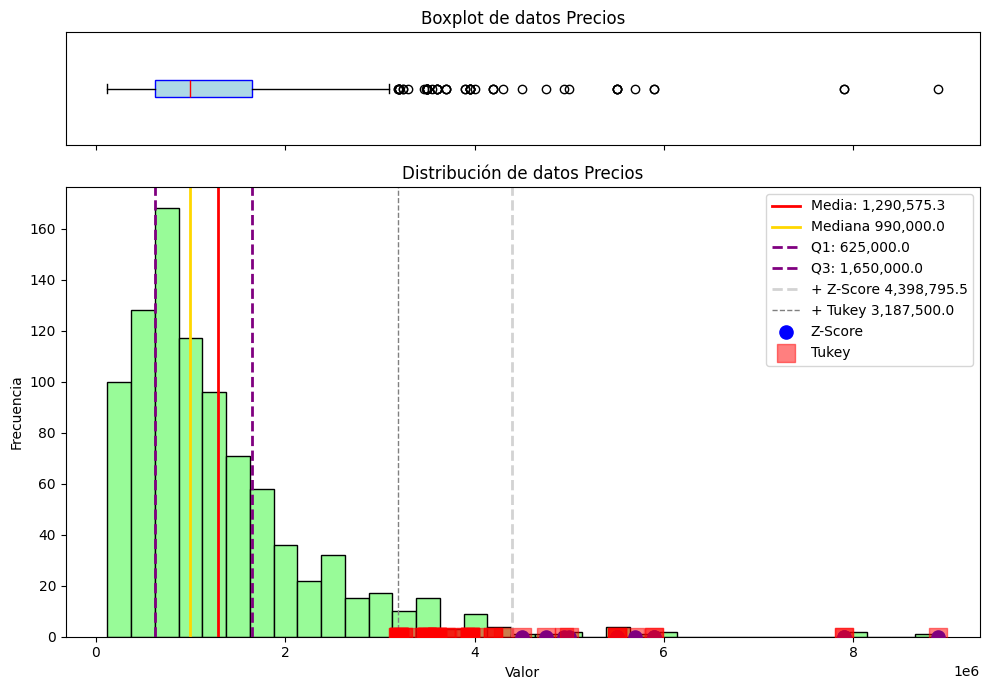

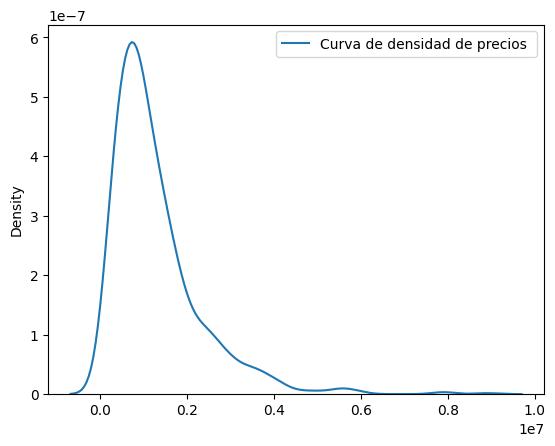

In [59]:
# Calcular los estadísticos para precios
estadisticos_price = estadisticos(price)
print("Estadísticos para precios:")
imprimir_estadisticas(estadisticos_price)
plot_data(price, 'Precios')

sns.kdeplot(price, label=f"Curva de densidad de precios ")
plt.legend();


Estadísticos para dormitorios:
Minimo: 0
Maximo: 12
Media: 3.474
Q1 (Primer Cuartil): 2.00
Q2 (Mediana): 3.00
Q3 (Tercer Cuartil): 4.00
Rango Intercuartil: 2.00
Desviación Estándar: 1.5938


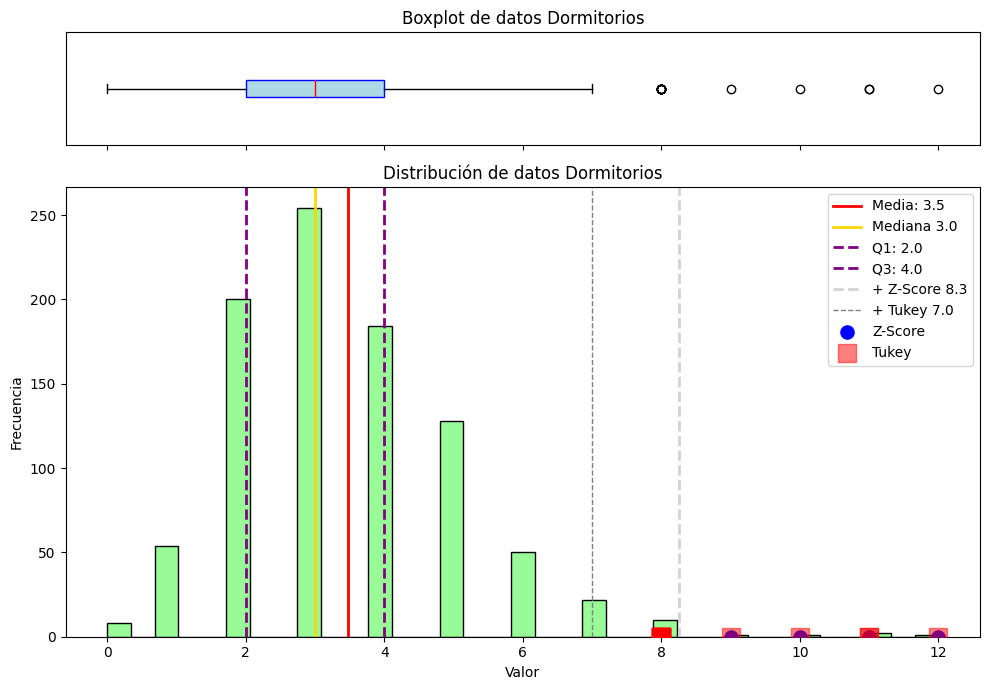

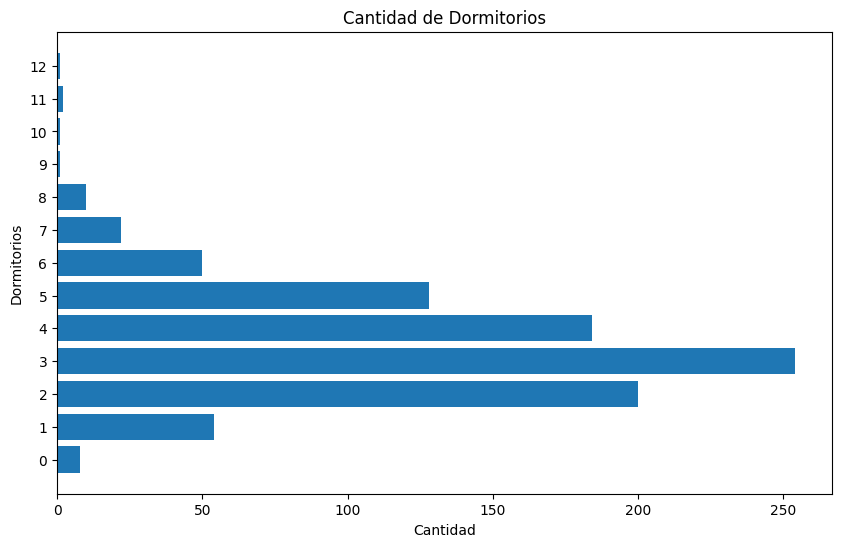

In [60]:
# Calcular los estadísticos para dormitorios
estadisticos_bedrooms = estadisticos(bedrooms)
print("Estadísticos para dormitorios:")
imprimir_estadisticas(estadisticos_bedrooms)
plot_data(bedrooms, 'Dormitorios')
bar_data(bedrooms, 'Dormitorios')


Estadísticos para baños:
Minimo: 1
Maximo: 12
Media: 2.901
Q1 (Primer Cuartil): 2.00
Q2 (Mediana): 3.00
Q3 (Tercer Cuartil): 4.00
Rango Intercuartil: 2.00
Desviación Estándar: 1.6256


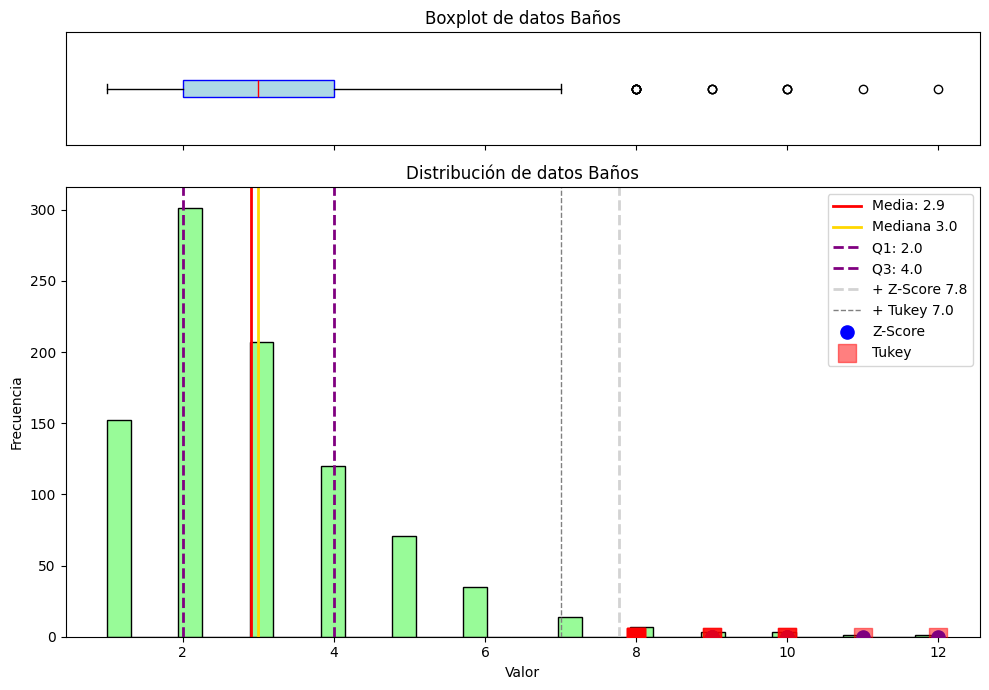

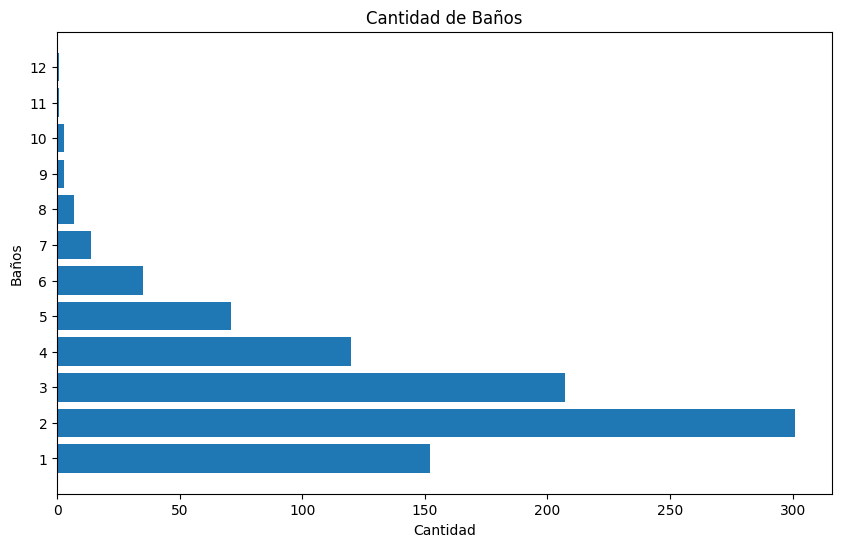

In [61]:
# Calcular los estadísticos para baños
estadisticos_bathrooms = estadisticos(bathrooms)
print("Estadísticos para baños:")
imprimir_estadisticas(estadisticos_bathrooms)
plot_data(bathrooms, 'Baños')
bar_data(bathrooms, 'Baños')

Estadísticos para metros2:
Minimo: 14
Maximo: 1,768
Media: 217.238
Q1 (Primer Cuartil): 104.00
Q2 (Mediana): 158.00
Q3 (Tercer Cuartil): 264.00
Rango Intercuartil: 160.00
Desviación Estándar: 191.6410


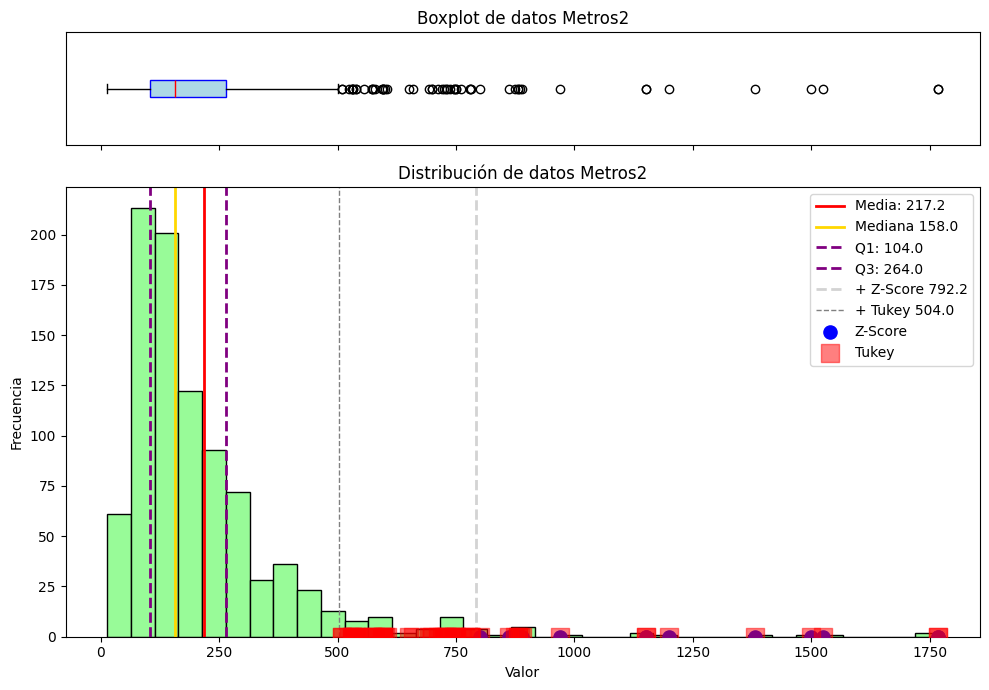

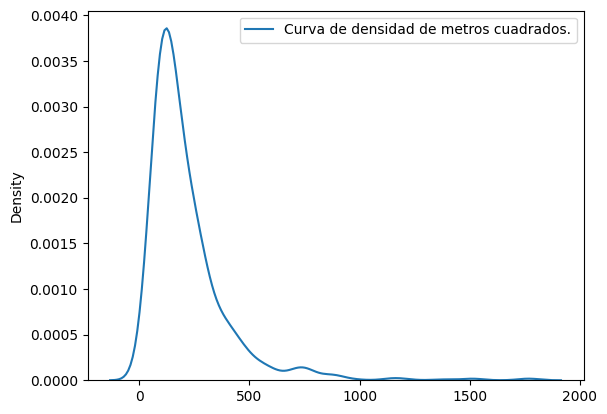

In [62]:
# Calcular los estadísticos para metros2
estadisticos_m2 = estadisticos(m2)
print("Estadísticos para metros2:")
imprimir_estadisticas(estadisticos_m2)
plot_data(m2, 'Metros2')
sns.kdeplot(m2, label=f"Curva de densidad de metros cuadrados.")
plt.legend();

## FILTRAR DATOS

In [63]:
# Calcular la media de las casas el 20 % más baratas y el 20 % más caras
percentil_20 = np.percentile(price, 20)
percentil_80 = np.percentile(price, 80)
print(f"percentil 20: {percentil_20:,.2f}")
print(f"percentil 80: {percentil_80:,.2f}")

casas_mas_baratas = price[price <= percentil_20]

casas_mas_caras = price[price >= percentil_80]

print("20 % de casas mas baratas")
print(casas_mas_baratas.shape)
print(f"media: {np.mean(casas_mas_baratas):,.2f}")
print("20 % de casas mas caras")
print(casas_mas_caras.shape)
print(f"media: {np.mean(casas_mas_caras):,.2f}")

percentil 20: 529,900.00
percentil 80: 1,850,000.00
20 % de casas mas baratas
(184,)
media: 350,706.89
20 % de casas mas caras
(185,)
media: 2,915,162.16


## Calculamos el 20 % de los barrios mas baratos

In [64]:
# Inicializamos las listas
barrios_con_pisos_mas_baratos = []
barrios_con_pisos_mas_caros = []

In [65]:
def calcular_media_por_barrio(price, address):
# Crear diccionario para almacenar los precios por barrio
    precios_por_barrio = defaultdict(list)
    for barrio, precio in zip(address, price):
        precios_por_barrio[barrio].append(precio)
        # se crean dos tablas para los barrios mas baratos y caros y poderlos usar con el counter
        if precio <= percentil_20:
            barrios_con_pisos_mas_baratos.append(barrio)
        elif precio >= percentil_80:
            barrios_con_pisos_mas_caros.append(barrio)

    # Calcular la mediana de los precios por barrio y añadir la cantidad de precios
    mediana_precios_por_barrio = {}
    for barrio, precios in precios_por_barrio.items():
        mediana_precios_por_barrio[barrio] = (np.median(precios), len(precios))
    
    # Ordenar los barrios por mediana de precios    
    barrios_ordenados = sorted(mediana_precios_por_barrio.items(), key=lambda x: x[1][0])
    barrios_ordenados = dict(barrios_ordenados)
    print(barrios_ordenados)
    return barrios_ordenados


In [66]:

# Agrupar precios por barrio
barrios_por_mediana = calcular_media_por_barrio(price, address)

{np.str_('San Diego'): (np.float64(152500.0), 2), np.str_('12 de Octubre-Orcasur'): (np.float64(155000.0), 1), np.str_('Zofío'): (np.float64(164000.0), 1), np.str_('Ensanche de Vallecas - La Gavia'): (np.float64(179000.0), 1), np.str_('San Fermín'): (np.float64(179000.0), 1), np.str_('Vista Alegre'): (np.float64(197450.0), 2), np.str_('Almendrales'): (np.float64(203000.0), 3), np.str_('Los Ángeles'): (np.float64(222000.0), 2), np.str_('Puente de Vallecas'): (np.float64(225000.0), 2), np.str_('Ventas'): (np.float64(228950.0), 4), np.str_('Pueblo Nuevo'): (np.float64(229900.0), 3), np.str_('Buena Vista'): (np.float64(230000.0), 1), np.str_('Amposta'): (np.float64(255900.0), 1), np.str_('San Isidro'): (np.float64(257000.0), 4), np.str_('Quintana'): (np.float64(259000.0), 3), np.str_('Opañel'): (np.float64(260000.0), 1), np.str_('Butarque'): (np.float64(265000.0), 1), np.str_('Latina'): (np.float64(270000.0), 1), np.str_('Simancas'): (np.float64(290000.0), 7), np.str_('Barajas'): (np.float

In [67]:

barrios_mas_baratos = []
barrios_mas_caros = []
for barrio, (mediana, cantidad) in barrios_por_mediana.items():
    if mediana <= percentil_20:
        barrios_mas_baratos.append(barrio)
    elif mediana >= percentil_80:
        barrios_mas_caros.append(barrio)


In [68]:
# Listar los barrios más baratos
print("Barrios más baratos (20%):")
for barrio in barrios_mas_baratos:
    print(barrio)

Barrios más baratos (20%):
San Diego
12 de Octubre-Orcasur
Zofío
Ensanche de Vallecas - La Gavia
San Fermín
Vista Alegre
Almendrales
Los Ángeles
Puente de Vallecas
Ventas
Pueblo Nuevo
Buena Vista
Amposta
San Isidro
Quintana
Opañel
Butarque
Latina
Simancas
Barajas
Moratalaz
Rejas
Berruguete
Bellas Vistas
Chopera
Pinar del Rey
Concepción
Pau de Carabanchel
Campamento
Lavapiés-Embajadores
Valdeacederas
Pacífico
Comillas
Casco Histórico de Barajas
Valdezarza
Imperial
Acacias
Guindalera
La Paz
Palos de Moguer
Costillares


## Calculamos el 20 % de los barrios mas caros


In [69]:
# Listar los barrios más baratos
print("Barrios más caros (20%):")
for barrio in barrios_mas_caros:
    print(barrio)



Barrios más caros (20%):
El Viso
Canillejas
Conde Orgaz-Piovera
Ciudad Jardín
Mirasierra
Nueva España
Almagro


## MODA

In [70]:
contador_mas_baratos = Counter(barrios_con_pisos_mas_baratos)
contador_mas_caros = Counter(barrios_con_pisos_mas_caros)

In [71]:
# 10 mas frecuentes de los barrios con casas mas baratas
top10_baratos = contador_mas_baratos.most_common(10)
for barrio, count in top10_baratos:
    print(f"el Barrio: {barrio} tiene {count} casas")

el Barrio: Lavapiés-Embajadores tiene 12 casas
el Barrio: Valdeacederas tiene 10 casas
el Barrio: Centro tiene 9 casas
el Barrio: Guindalera tiene 6 casas
el Barrio: Hortaleza tiene 6 casas
el Barrio: Fuencarral tiene 5 casas
el Barrio: Chueca-Justicia tiene 5 casas
el Barrio: Malasaña-Universidad tiene 5 casas
el Barrio: Simancas tiene 5 casas
el Barrio: San Isidro tiene 4 casas


In [72]:
# 10 mas frecuentes de los barrios con casas mas caras
top10_caros= contador_mas_caros.most_common(10)
for barrio, count in top10_caros:
    print(f"el Barrio: {barrio} tiene {count} casas")

el Barrio: Hortaleza tiene 21 casas
el Barrio: Barrio de Salamanca tiene 20 casas
el Barrio: Chamartín tiene 19 casas
el Barrio: Moncloa tiene 19 casas
el Barrio: Almagro tiene 13 casas
el Barrio: Chamberí tiene 11 casas
el Barrio: Recoletos tiene 9 casas
el Barrio: Fuencarral tiene 8 casas
el Barrio: Castellana tiene 7 casas
el Barrio: Centro tiene 6 casas


In [73]:
contador = Counter(address)
# 10 menos frecuentes
manufaturers_sorted = sorted(contador.items(), key=lambda item: item[1])
manufaturers_sorted[:10]


[(np.str_('Comillas'), 1),
 (np.str_('Bellas Vistas'), 1),
 (np.str_('Pau de Carabanchel'), 1),
 (np.str_('Zofío'), 1),
 (np.str_('Legazpi'), 1),
 (np.str_('Pinar del Rey'), 1),
 (np.str_('Opañel'), 1),
 (np.str_('El Cañaveral'), 1),
 (np.str_('Sanchinarro'), 1),
 (np.str_('Concepción'), 1)]

In [74]:

# Mostrar los 10 barrios que más casas tienen en este dataset
top_10 = contador.most_common(10)
for barrio, count in top_10:
    print(f"el Barrio: {barrio} tiene {count} casas")

el Barrio: Barrio de Salamanca tiene 63 casas
el Barrio: Hortaleza tiene 60 casas
el Barrio: Chamartín tiene 54 casas
el Barrio: Moncloa tiene 48 casas
el Barrio: Centro tiene 47 casas
el Barrio: Fuencarral tiene 35 casas
el Barrio: Chamberí tiene 34 casas
el Barrio: Malasaña-Universidad tiene 25 casas
el Barrio: Goya tiene 22 casas
el Barrio: Lista tiene 22 casas


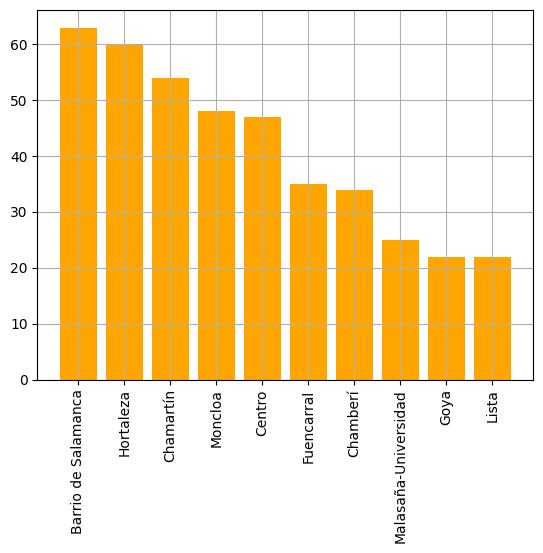

In [75]:
barrio, conteos =  zip(*top_10) 
plt.bar(barrio, conteos, color='orange')
plt.xticks(rotation=90)
plt.grid()

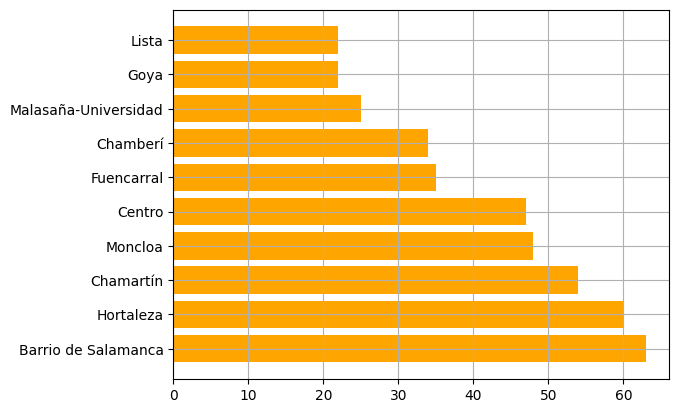

In [76]:
plt.barh(barrio, conteos, color='orange')
plt.xticks()
plt.grid()

## CORRELACIÓN

In [77]:
# Coeficiente de correlación lineal de Pearson
# Variables metros cuadrados y precio
correlacionm2 = stats.pearsonr(m2, price)[0]
print(f"Correlación entre metros cuadrados y precio: {correlacionm2:.4f}")
# Variables habitaciones y precio
correlacion_bedrooms = stats.pearsonr(bedrooms, price)[0]
print(f"Correlación entre habitaciones y precio: {correlacion_bedrooms:.4f}")
# Variables baños y precio  
correlacion_bathrooms = stats.pearsonr(bathrooms, price)[0] 
print(f"Correlación entre baños y precio: {correlacion_bathrooms:.4f}")

Correlación entre metros cuadrados y precio: 0.6818
Correlación entre habitaciones y precio: 0.5572
Correlación entre baños y precio: 0.6916


* 1: correlación positiva
* 0: no hay correlación
* -1: correlación negativa

Por los valores obtenidos, lo interpretaríamos como que hay una correlación positiva entre metros2, habitacioes, baños y precio de las casas. Es decir, que cuántos más metros2, habitacines y baños son mas caras.

In [78]:
columnas = [m2, bedrooms, bathrooms, price] # 4 columnas del CSV

matriz_lista = list()

for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])
    
    matriz_lista.append(fila)
    
matriz = np.array(matriz_lista)
print(matriz)

[[1.         0.71265478 0.81873292 0.68176241]
 [0.71265478 1.         0.77076481 0.55718932]
 [0.81873292 0.77076481 1.         0.69162529]
 [0.68176241 0.55718932 0.69162529 1.        ]]


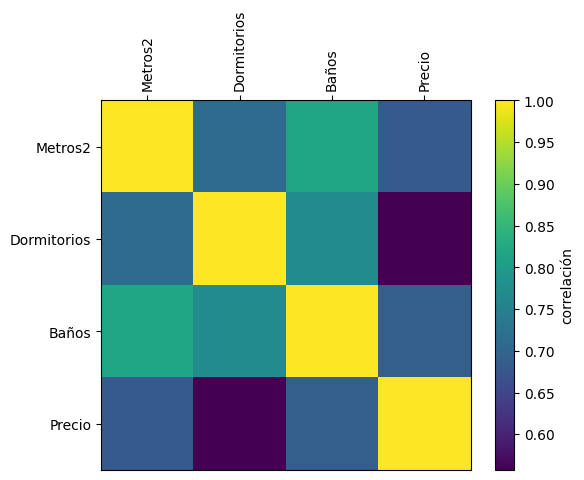

In [79]:
column_names = ['Metros2', 'Dormitorios', 'Baños', 'Precio']
plt.imshow(matriz, cmap='viridis')
plt.colorbar(label='correlación')
plt.xticks(range(len(column_names)), column_names, rotation=90)
plt.yticks(range(len(column_names)), column_names)
plt.gca().xaxis.set_ticks_position('top')

<Axes: >

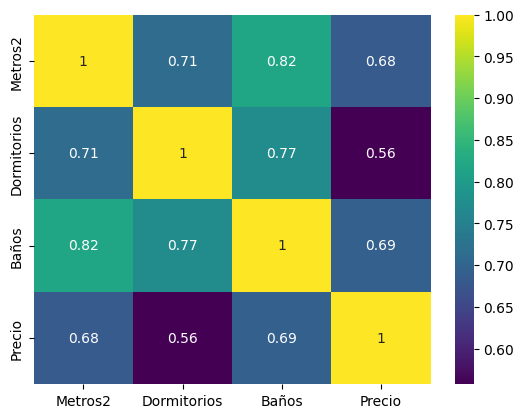

In [80]:
# plt.figure(figsize= (10,8))
sns.heatmap(matriz, annot=True, cmap='viridis', xticklabels=column_names, yticklabels=column_names)

## ESTANDARIZACIÓN

In [81]:
mean_precios = np.mean(price)
median_precios = np.median(price)
std_precios = np.std(price)

print(f"Media original precios: {mean_precios:,.3f}")
print(f"Mediana original precios: {median_precios:,.3f}")
print(f"Desviación estandar original precios: {std_precios:,.3f}")
print("")

mean_m2 = np.mean(m2)
median_m2 = np.median(m2)
std_m2 = np.std(m2)

print(f"Media original metros cuadrados: {mean_m2:,.3f}")
print(f"Mediana original metros cuadrados: {median_m2:,.3f}")
print(f"Desviación estandar original metros cuadrados: {std_m2:,.3f}")
print("")

mean_habitaciones  = np.mean(bedrooms)
median_habitaciones = np.median(bedrooms)
std_habitaciones = np.std(bedrooms)

print(f"Media original habitaciones: {mean_habitaciones:,.3f}")
print(f"Mediana original habitaciones: {median_habitaciones:,.3f}")
print(f"Desviación estandar original habitaciones: {std_habitaciones:,.3f}")
print("")

mean_banyos  = np.mean(bathrooms)
median_banyos = np.median(bathrooms)
std_banyos = np.std(bathrooms)

print(f"Media original baños: {mean_banyos:,.3f}")
print(f"Mediana original baños: {median_banyos:,.3f}")
print(f"Desviación estandar original baños: {std_banyos:,.3f}")

Media original precios: 1,290,575.262
Mediana original precios: 990,000.000
Desviación estandar original precios: 1,036,073.402

Media original metros cuadrados: 217.238
Mediana original metros cuadrados: 158.000
Desviación estandar original metros cuadrados: 191.641

Media original habitaciones: 3.474
Mediana original habitaciones: 3.000
Desviación estandar original habitaciones: 1.594

Media original baños: 2.901
Mediana original baños: 3.000
Desviación estandar original baños: 1.626


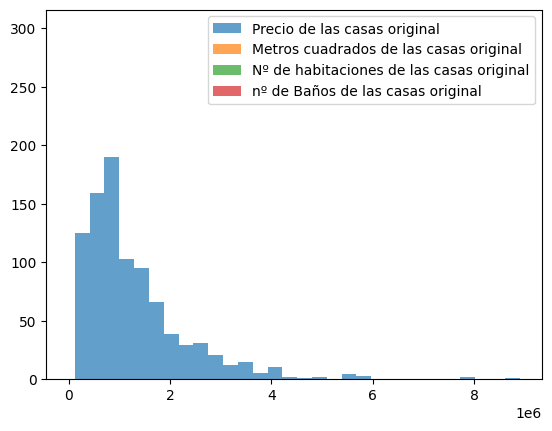

In [82]:
plt.hist(price, bins=30, alpha=0.7, label="Precio de las casas original")
plt.hist(m2, bins=30, alpha=0.7, label="Metros cuadrados de las casas original")
plt.hist(bedrooms, bins=30, alpha=0.7, label="Nº de habitaciones de las casas original")
plt.hist(bathrooms, bins=30, alpha=0.7, label="nº de Baños de las casas original")
plt.legend();

In [83]:
precios_standard = (price - mean_precios) / std_precios
print(precios_standard[:5])


[0.60750979 0.67989849 0.00909659 0.3469105  0.28972343]


In [84]:
m2_standard = (m2 - mean_m2) / std_m2
print(m2_standard[:5])


[-0.17865826 -0.24649343  0.27531553  0.16051756 -0.52827026]


In [85]:
habitaciones_standard = (bedrooms - median_habitaciones) / std_habitaciones
print(habitaciones_standard[:5])

[0.         0.         0.62744954 0.         0.        ]


In [86]:
banyos_standard = (bathrooms - mean_banyos) / std_banyos
print(banyos_standard[:5])

[0.06117968 0.06117968 0.06117968 0.06117968 0.06117968]


In [87]:
# estandarizar y volver a pintar el histograma
mean_precios = np.mean(precios_standard)
median_precios = np.median(precios_standard)
std_precios = np.std(precios_standard)

print(f"Media estandar precios: {mean_precios:}")
print(f"Mediana estandar precios: {median_precios}")
print(f"Desviación estandar precios: {std_precios}")
print("")

mean_m2 = np.mean(m2_standard)
median_m2 = np.median(m2_standard)
std_m2 = np.std(m2_standard)

print(f"Media estandar metros cuadrados: {mean_m2}")
print(f"Mediana estandar metros cuadrados: {median_m2}")
print(f"Desviación estandar metros cuadrados: {std_m2}")
print("")

mean_habitaciones  = np.mean(bedrooms)
median_habitaciones = np.median(bedrooms)
std_habitaciones = np.std(bedrooms)

print(f"Media estandar habitaciones: {mean_habitaciones}")
print(f"Mediana estandar habitaciones: {median_habitaciones}")
print(f"Desviación estandar habitaciones: {std_habitaciones}")
print("")

mean_banyos = np.mean(banyos_standard)
median_banyos = np.median(banyos_standard)
std_banyos = np.std(banyos_standard)

print(f"Media estandar baños: {mean_banyos}")
print(f"Mediana estandar baños: {median_banyos}")
print(f"Desviación estandar baños: {std_banyos}")

Media estandar precios: -1.9413735949729513e-17
Mediana estandar precios: -0.290110007265992
Desviación estandar precios: 0.9999999999999999

Media estandar metros cuadrados: 4.271021908940493e-17
Mediana estandar metros cuadrados: -0.30911050217387276
Desviación estandar metros cuadrados: 1.0

Media estandar habitaciones: 3.4743169398907106
Mediana estandar habitaciones: 3.0
Desviación estandar habitaciones: 1.5937536707211326

Media estandar baños: -1.397788988380525e-16
Mediana estandar baños: 0.06117968151490091
Desviación estandar baños: 1.0


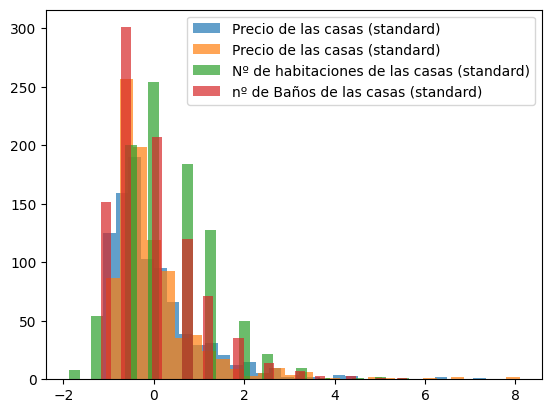

In [88]:
plt.hist(precios_standard, bins=30, alpha=0.7, label="Precio de las casas (standard)")
plt.hist(m2_standard, bins=30, alpha=0.7, label="Precio de las casas (standard)")
plt.hist(habitaciones_standard, bins=30, alpha=0.7, label="Nº de habitaciones de las casas (standard)")
plt.hist(banyos_standard, bins=30, alpha=0.7, label="nº de Baños de las casas (standard)")
# Configurar los ticks del eje X para que salgan de uno en uno 
plt.legend();

## ASIMETRÍA Y CURTOSIS

In [89]:
# coeficiente de asimetría (skewness)

print(f"Coeficiente de asimetría Precio: {stats.skew(price)}")
print(f"Coeficiente de asimetría Metros cuadrados: {stats.skew(m2)}")
print(f"Coeficiente de asimetría Dormitorios: {stats.skew(bedrooms)}")
print(f"Coeficiente de asimetría Baños: {stats.skew(bathrooms)}")

Coeficiente de asimetría Precio: 2.299673447902698
Coeficiente de asimetría Metros cuadrados: 3.358506945156488
Coeficiente de asimetría Dormitorios: 0.8842091486712003
Coeficiente de asimetría Baños: 1.406223480498869


Interpretación:

* No es cercano a 0 por lo que hay asimetría, es decir, que la distribución no es simétrica.


In [90]:
# curtosis:
print(f"Curtosis Precio: {stats.kurtosis(price)}")
print(f"Curtosis Metros cuadrados: {stats.kurtosis(m2)}")
print(f"Curtosis Dormitorios: {stats.kurtosis(bedrooms)}")
print(f"Curtosis Baños: {stats.kurtosis(bathrooms)}")


Curtosis Precio: 8.547211919938682
Curtosis Metros cuadrados: 17.229111152834456
Curtosis Dormitorios: 1.9002632477464054
Curtosis Baños: 3.038919834628685


Interpretación:

1. Leptocúrtica ($k_3 > 0$): Decaimiento rápido, cola ligera.
2. Mesocúrtica ($k_3=0$): Curva normal.
3. Paticúrtica ($k_3<0$ ): Decaimiento lento.

Se aprecia un decimiento lento


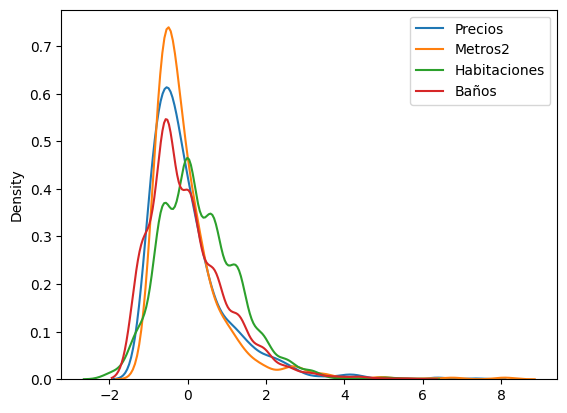

In [91]:
sns.kdeplot(precios_standard, label="Precios")
sns.kdeplot(m2_standard, label="Metros2")
sns.kdeplot(habitaciones_standard, label="Habitaciones")
sns.kdeplot(banyos_standard, label="Baños")

plt.legend();


## CONTRASTE DE HIPÓTESIS

Ejercicio 12:

- Realiza un contraste de hipótesis y comprueba que:Contraste de hipótesis:
    * Que las casas de X barrio son más baratas de las de Y barrio
    * Que las casas de >= 3 baños son más caras que las casas de 1-2 baños
    

### Contraste de hipótesis para comparar precios de casas entre dos barrios:
- Hipótesis nula (H0): El precio medio de las casas en el barrio X es igual al precio medio de las casas en el barrio Y.
- Hipótesis alternativa (H1): El precio medio de las casas en el barrio X es menor al precio medio de las casas en el barrio Y.

In [92]:
alpha = 0.05 #Nivel de significancia.

In [93]:
def contraste_normalidad_homogeneidad(unidad1, unidad2, array1, array2):
    student = True # Asumimos que usaremos la t de Student
    print(f"Contraste de normalidad entre {unidad1} y {unidad2}")
    
    # Realizar la prueba de Shapiro-Wilk para ambas muestras
    _, p_muestra1 = stats.normaltest(array1)
    _, p_muestra2 = stats.normaltest(array2)
    
    print(f'{unidad1}: {p_muestra1} y {unidad2}: {p_muestra2}')       
      
    print("Contraste de homogeneidad de varianzas")
    
    t_stat, p_valor = stats.levene(array1, array2)
    
    # Imprimir los resultados
    print(f"Varianza t: {t_stat:.6f} p-valor: {p_valor:.4f}")
    suposiciones = p_muestra1 > alpha and p_muestra2 > alpha and p_valor > alpha
    if suposiciones:
        print("Se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS")
    else:
        print("NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS")  
    return suposiciones
   

### Calculamos la t de Student o la U de Mann-Whitney, dependiendo de si se cumplen las asunciones

In [94]:
def calcular_hipotesis(suposiciones, array1, array2):
    if suposiciones:
        t, p = stats.ttest_ind(array1, array2, alternative="greater")
        print(f"El valor t de Student es: {t}, El valor p es: {p}.")
        return p
    else:
         u, p = stats.mannwhitneyu(array1, array2, alternative="greater")
         print(f"El valor U de Mann-Whitney es: {u}, El valor p es: {p}.")
    return p

In [95]:
barrio1 ='Recoletos' 
barrio2 ='Hortaleza' 
# Preparamos los datos para la comparación de barrios
print(f"Contraste de hipotesis 1: Precios en {barrio1} vs {barrio2}.")
precios_barrio_X = [precio for precio, barrio in zip(price, address) if barrio == barrio1]
precios_barrio_Y = [precio for precio, barrio in zip(price, address) if barrio == barrio2]

suposiciones = contraste_normalidad_homogeneidad(barrio1, barrio2, precios_barrio_X, precios_barrio_Y)
p = calcular_hipotesis(suposiciones, precios_barrio_X, precios_barrio_Y)
if p < alpha:
    print(f"Se rechaza la H0, las casas de {barrio1} son mas caras que en {barrio2}.")
else:
    print(f"No se rechaza la H0, las casas de {barrio1} son igual o mas baratas que en {barrio2}")

Contraste de hipotesis 1: Precios en Recoletos vs Hortaleza.
Contraste de normalidad entre Recoletos y Hortaleza
Recoletos: 0.0007662670226264586 y Hortaleza: 8.680163926990799e-07
Contraste de homogeneidad de varianzas
Varianza t: 3.350226 p-valor: 0.0710
NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS
El valor U de Mann-Whitney es: 771.5, El valor p es: 0.028656659192287198.
Se rechaza la H0, las casas de Recoletos son mas caras que en Hortaleza.


Repetimos el contraste de hipotesis pero con el mismo barrio para comprobar el funcionamiento

In [96]:
barrio1 ='Malasaña-Universidad' 
barrio2 ='Malasaña-Universidad' 
# Preparamos los datos para la comparación de barrios
print(f"Contraste de hipotesis 1: Precios en {barrio1} vs {barrio2}.")
precios_barrio_X = [precio for precio, barrio in zip(price, address) if barrio == barrio1]
precios_barrio_Y = [precio for precio, barrio in zip(price, address) if barrio == barrio2]

suposiciones = contraste_normalidad_homogeneidad(barrio1, barrio2, precios_barrio_X, precios_barrio_Y)
p = calcular_hipotesis(suposiciones, precios_barrio_X, precios_barrio_Y)
if p < alpha:
    print(f"Se rechaza la H0, las casas de {barrio1} son mas caras que en {barrio2}.")
else:
    print(f"No se rechaza la H0, las casas de {barrio1} son igual o mas baratas que en {barrio2}")

Contraste de hipotesis 1: Precios en Malasaña-Universidad vs Malasaña-Universidad.
Contraste de normalidad entre Malasaña-Universidad y Malasaña-Universidad
Malasaña-Universidad: 8.000475046163916e-08 y Malasaña-Universidad: 8.000475046163916e-08
Contraste de homogeneidad de varianzas
Varianza t: 0.000000 p-valor: 1.0000
NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS
El valor U de Mann-Whitney es: 312.5, El valor p es: 0.5038763018918484.
No se rechaza la H0, las casas de Malasaña-Universidad son igual o mas baratas que en Malasaña-Universidad


In [97]:
barrio1 ='Hortaleza' 
barrio2 ='Recoletos' 
# Preparamos los datos para la comparación de barrios
print(f"Contraste de hipotesis 1: Precios en {barrio1} vs {barrio2}.")
precios_barrio_X = [precio for precio, barrio in zip(price, address) if barrio == barrio1]
precios_barrio_Y = [precio for precio, barrio in zip(price, address) if barrio == barrio2]

suposiciones = contraste_normalidad_homogeneidad(barrio1, barrio2, precios_barrio_X, precios_barrio_Y)
p = calcular_hipotesis(suposiciones, precios_barrio_X, precios_barrio_Y)
if p < alpha:
    print(f"Se rechaza la H0, las casas de {barrio1} son mas caras que en {barrio2}.")
else:
    print(f"No se rechaza la H0, las casas de {barrio1} son igual o mas baratas que en {barrio2}")

Contraste de hipotesis 1: Precios en Hortaleza vs Recoletos.
Contraste de normalidad entre Hortaleza y Recoletos
Hortaleza: 8.680163926990799e-07 y Recoletos: 0.0007662670226264586
Contraste de homogeneidad de varianzas
Varianza t: 3.350226 p-valor: 0.0710
NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS
El valor U de Mann-Whitney es: 428.5, El valor p es: 0.972063836261563.
No se rechaza la H0, las casas de Hortaleza son igual o mas baratas que en Recoletos


### Contraste de hipótesis para comparar precios de casas según el número de baños:
- Hipótesis nula (H0): El precio medio de las casas con >= 3 baños es igual al precio medio de las casas con 1-2 baños.
- Hipótesis alternativa (H1): El precio medio de las casas con >= 3 baños es mayor al precio medio de las casas con 1-2 baños.

In [98]:

supos1 ='>= 3 baños' 
supos2 ='1 o 2 baños' 
# Preparamos los datos para la comparación de baños
precios1 = [precio for precio, banho in zip(price, bathrooms) if banho >= 3]
precios2 = [precio for precio, banho in zip(price, bathrooms) if banho <3]

# Preparamos los datos para la comparación de por Baños
print(f"Contraste de hipotesis 1: Precios casas con {supos1} vs  con {supos2}.")

suposiciones = contraste_normalidad_homogeneidad(supos1, supos2, precios1, precios2)
p = calcular_hipotesis(suposiciones, precios1, precios2)
if p < alpha:
    print(f"Se rechaza la H0, las casas con {supos1} son mas caras que las de {supos2}.")
else:
    print(f"No se rechaza la H0, las casas con {supos1} son igual o mas baratas que las de {supos2}")

Contraste de hipotesis 1: Precios casas con >= 3 baños vs  con 1 o 2 baños.
Contraste de normalidad entre >= 3 baños y 1 o 2 baños
>= 3 baños: 5.1773658792899416e-51 y 1 o 2 baños: 4.396350255291707e-49
Contraste de homogeneidad de varianzas
Varianza t: 123.010260 p-valor: 0.0000
NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS
El valor U de Mann-Whitney es: 192936.0, El valor p es: 1.952124026653252e-108.
Se rechaza la H0, las casas con >= 3 baños son mas caras que las de 1 o 2 baños.


Repetimos el contraste de hipotesis con hipotesis alternativa

In [99]:

supos1 ='1 o 2 baños' 
supos2 ='>= 3 baños' 
# Preparamos los datos para la comparación de baños
precios1 = [precio for precio, banho in zip(price, bathrooms) if banho <3]
precios2 = [precio for precio, banho in zip(price, bathrooms) if banho >= 3]

# Preparamos los datos para la comparación de por Baños
print(f"Contraste de hipotesis 1: Precios casas con {supos1} vs  con {supos2}.")

suposiciones = contraste_normalidad_homogeneidad(supos1, supos2, precios1, precios2)
p = calcular_hipotesis(suposiciones, precios1, precios2)
if p < alpha:
    print(f"Se rechaza la H0, las casas con {supos1} son mas caras que las de {supos2}.")
else:
    print(f"No se rechaza la H0, las casas con {supos1} son igual o mas baratas que las de {supos2}")

Contraste de hipotesis 1: Precios casas con 1 o 2 baños vs  con >= 3 baños.
Contraste de normalidad entre 1 o 2 baños y >= 3 baños
1 o 2 baños: 4.396350255291707e-49 y >= 3 baños: 5.1773658792899416e-51
Contraste de homogeneidad de varianzas
Varianza t: 123.010260 p-valor: 0.0000
NO se cumple la asunción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS
El valor U de Mann-Whitney es: 16350.0, El valor p es: 1.0.
No se rechaza la H0, las casas con 1 o 2 baños son igual o mas baratas que las de >= 3 baños
